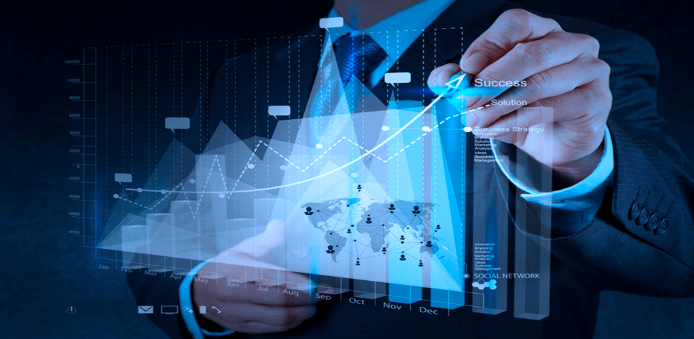

# <code> Reto Técnico, Líder de Datos Power BI <code>

## 1.- Implementación de proceso ETL: Extracción, Transformación y Carga.

In [7]:
import pandas as pd

In [2]:
# EXTRACCIÒN de dataset
df = pd.read_csv('C:/Users/Isaac/Desktop/IHD/Caso Tecnico Tec Monterrey/BD_OPORTUNIDADES_23_24.csv')
df.head(10)

,IdOportunidad,IdEmpresa,IdPropietario,TipoDivisaAjuste,Zona,Importe,FechaCierre,Participantes
0,0068X00001J86CmQAJ,0018X00003EzoAGQAZ,005UG000001VnS5YAK,MXN,Zona 1,23500,31/12/2024 00:00,16
1,0068X00001LSg5uQAD,0018X00003HtWRNQA3,0058X00000GNvZSQA1,USD,Zona 1,cero,31/12/2024 00:00,Sin datos
2,0068X00001LSgCPQA1,0018X00003O5bpAQAR,0058X00000GNvZSQA1,USD,Zona 1,cero,31/12/2024 00:00,Sin datos
3,0068X00001LSgCPQA1,0018X00003O5bpAQAR,0058X00000GNvZSQA1,USD,Zona 1,cero,31/12/2024 00:00,Sin datos
4,0068X00001LSgMsQAL,0018X00003O5c1hQAB,0058X00000GNvZSQA1,USD,Zona 1,cero,31/12/2024 00:00,Sin datos
5,006UG000003l4phYAA,0013f000003TnJRAA0,0052M000008ag3jQAA,MXN,Zona 5,263184,31/12/2024 00:00,0
6,006UG000004Sy70YAC,0018X00003P5wctQAB,0052M000008Jq5HQAS,USD,NaN,130000,31/12/2024 00:00,Sin datos
7,006UG000006JAhlYAG,0012M000029HZGHQA4,0058X00000Gotl2QAB,USD,Zona 1,44200,31/12/2024 00:00,0
8,006UG000007DglOYAS,0014100001uMubeAAC,0058X00000FQzgUQAT,MXN,Zona 2,225000,31/12/2024 00:00,Sin datos
9,006UG000007DglOYAS,0014100001uMubeAAC,0058X00000FQzgUQAT,MXN,Zona 2,225000,31/12/2024 00:00,Sin datos


In [102]:
# Resumen del DataFrame, incluyendo el número de filas, columnas, tipos de datos y valores nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7525 entries, 0 to 7524
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   IdOportunidad     7525 non-null   object
 1   IdEmpresa         7525 non-null   object
 2   IdPropietario     7525 non-null   object
 3   TipoDivisaAjuste  7525 non-null   object
 4   Zona              7489 non-null   object
 5   Importe           7525 non-null   object
 6   FechaCierre       7525 non-null   object
 7   Participantes     7525 non-null   object
dtypes: object(8)
memory usage: 470.4+ KB


In [103]:
# Revisamos valores estadiscos básicos, nos permite ver la cantidad de valores en las variables númericas
# valores unicos, valores que tienen mayor frecuencia.
df.describe()

,IdOportunidad,IdEmpresa,IdPropietario,TipoDivisaAjuste,Zona,Importe,FechaCierre,Participantes
count,7525,7525,7525,7525,7489,7525,7525,7525
unique,5525,2316,113,3,5,2581,639,212
top,0068X00001GNJEuQAP,0014100001uMsHYAA0,0053f000000lhfmAAA,MXN,Zona 3,cero,30/09/2024 00:00,Sin datos
freq,5,117,221,6648,1748,618,111,1570


## 2.-  Tranformación: Limpieza y Análisis del dataset.

In [104]:
# cambiamos el tipo de dato a la columna 'FechaCierre' ya que originalmente tenia un tipo de dato 'Object'
df['FechaCierre'] = pd.to_datetime(df['FechaCierre'])

In [105]:
# identificar valores duplicados de la columna IdOportunidad, en esta columna no debe de haber datos duplicados ya que 
# el Id debe de ser unico para garantizar integridad de los datos.
df[df.duplicated(subset='IdOportunidad', keep=False)]

,IdOportunidad,IdEmpresa,IdPropietario,TipoDivisaAjuste,Zona,Importe,FechaCierre,Participantes
0,0068X00001J86CmQAJ,0018X00003EzoAGQAZ,005UG000001VnS5YAK,MXN,Zona 1,23500,2024-12-31,16
2,0068X00001LSgCPQA1,0018X00003O5bpAQAR,0058X00000GNvZSQA1,USD,Zona 1,cero,2024-12-31,Sin datos
3,0068X00001LSgCPQA1,0018X00003O5bpAQAR,0058X00000GNvZSQA1,USD,Zona 1,cero,2024-12-31,Sin datos
8,006UG000007DglOYAS,0014100001uMubeAAC,0058X00000FQzgUQAT,MXN,Zona 2,225000,2024-12-31,Sin datos
9,006UG000007DglOYAS,0014100001uMubeAAC,0058X00000FQzgUQAT,MXN,Zona 2,225000,2024-12-31,Sin datos
...,...,...,...,...,...,...,...,...
7515,0068X00001GMFUOQA5,0018X000038P91GQAS,0053f000000ERMNAA4,MXN,Zona 2,1484410,2023-06-01,0
7516,0068X00001GMFUOQA5,0018X000038P91GQAS,0053f000000ERMNAA4,MXN,Zona 2,1484410,2023-06-01,0
7518,0068X00001DkFJjQAN,0018X000032W78LQAS,00541000007MjhOAAS,USD,Zona 4,50000,2023-06-01,100
7521,0068X00001EuHnjQAF,0014100001uMsEQAA0,00541000007MjftAAC,MXN,Zona 2,2190000,2023-02-01,334


In [106]:
# Se observa que hay valores de texto.
# reemplazamos 'cero' por '0', 'diez' por '10', 'cien' por '100', 'diez mil' por '10000' de la columna Importe.
def replace_values(df, column):
    replace_val = {'cero' : 0, 'diez' : 10, 'cien' : 100, 'diez mil' : 10000}
    df[column] = df[column].replace(replace_val)
    return df

In [107]:
# reemplazamos 'sin datos' por '0' en la columna 'Participantes', ya que es columna númerica.
def replace_val_sin_datos(df, column):
    df[column] = df[column].replace({'Sin datos' : 0})
    return df

In [108]:
# función para imputar datos faltantes de la tabla 'zona' se imputan tomando encuanta la Moda 
# de la tabla ya que es una columna categorica y analizando los datos es viable usar la Moda.
def fill_na_in_column(df, column, fill_value):
    df[column] = df[column].fillna(fill_value)
    return df

In [109]:
# funcion para eliminar duplicados de la columna 'IdOportunidad' ya que en esta columna son llaves primarias y no debe de haber valores duplicads.
def remove_duplicates(df, column):
    df = df.drop_duplicates(subset = column, keep = 'first')
    return df   

In [110]:
# Ejecución del pipeline 

def preprocess_data(df):
    return(
        df.pipe(replace_values, 'Importe')
          .pipe(replace_val_sin_datos, 'Participantes')
          .pipe(fill_na_in_column, 'Zona', df['Zona'].mode().iloc[0])
          .pipe(remove_duplicates, 'IdOportunidad')
    )

In [111]:
df = preprocess_data(df)

In [112]:
# Normalizar a mayúsculas
df['Zona'] = df['Zona'].str.upper()

In [113]:
# Quitar espacios
columns = ['IdOportunidad','IdEmpresa','IdPropietario','TipoDivisaAjuste','Zona']
for col in columns:
    df[col] = df[col].str.strip()

In [114]:
# Cambiamos el tipo de dato a la colimna Importe a int
df['Importe'] = df['Importe'].astype('int64')
df['Participantes'] = df['Participantes'].astype('int64')

In [115]:
# Solo vamos a manejar cantidades en moneda Nacional MXN
# Agregamos una Columna de Tipos de Cambio que relacione las divisas con su tipo de cambio a MXN:
tipo_de_cambio = {
    'MXN' : 1.00,
    'USD' : 20.20,
    'EUR' : 21.20
}

df['ImporteEnMXN'] = df['Importe'] * df['TipoDivisaAjuste'].map(tipo_de_cambio)

In [124]:
# Mostramos los primeros q0 registros del DataFrame
df.head(10)

,IdOportunidad,IdEmpresa,IdPropietario,TipoDivisaAjuste,Zona,Importe,FechaCierre,Participantes,ImporteEnMXN,ClasificacionZona,RangoImporte,RendimientoPorZona,AñoCierre,MesCierre,ImporteAcumulado,CrecimientoRelativo
0,0068X00001J86CmQAJ,0018X00003EzoAGQAZ,005UG000001VnS5YAK,MXN,ZONA 1,23500,2024-12-31,16,23500.0,Central,Muy Bajo,1468.75,2024,12,23500.0,0.000000
5,006UG000003l4phYAA,0013f000003TnJRAA0,0052M000008ag3jQAA,MXN,ZONA 5,263184,2024-12-31,0,263184.0,Periferica,Bajo,263184.00,2024,12,263184.0,0.000000
6,006UG000004Sy70YAC,0018X00003P5wctQAB,0052M000008Jq5HQAS,USD,ZONA 3,130000,2024-12-31,0,2626000.0,Periferica,Medio,2626000.00,2024,12,2626000.0,0.000000
7,006UG000006JAhlYAG,0012M000029HZGHQA4,0058X00000Gotl2QAB,USD,ZONA 1,44200,2024-12-31,0,892840.0,Central,Bajo,892840.00,2024,12,892840.0,0.000000
8,006UG000007DglOYAS,0014100001uMubeAAC,0058X00000FQzgUQAT,MXN,ZONA 2,225000,2024-12-31,0,225000.0,Central,Bajo,225000.00,2024,12,225000.0,0.000000
10,006UG000007jHdOYAU,001UG000009FwuXYAS,00541000007Mjh2AAC,USD,ZONA 1,12290,2024-12-31,0,248258.0,Central,Bajo,248258.00,2024,12,248258.0,0.000000
11,006UG000007KpYbYAK,0014100001uMqWwAAK,00541000007Mjh2AAC,USD,ZONA 1,19200,2024-12-31,0,387840.0,Central,Bajo,387840.00,2024,12,636098.0,1.562246
12,006UG000007mqmgYAA,001UG000009FtLaYAK,00541000007Mjh2AAC,USD,ZONA 1,39000,2024-12-31,30,787800.0,Central,Bajo,26260.00,2024,12,1423898.0,4.735557
13,006UG000007NbPTYA0,001UG000008oRZtYAM,0053f000000ERMNAA4,MXN,ZONA 2,294797,2024-12-31,25,294797.0,Central,Bajo,11791.88,2024,12,294797.0,0.000000
14,006UG000007z1hWYAQ,0013f000004YkX1AAK,00541000007Mjh2AAC,USD,ZONA 1,13750,2024-12-31,0,277750.0,Central,Bajo,277750.00,2024,12,1701648.0,5.854353


In [117]:
# Se calsifican las Zonas en dos grupos 'Central' y 'Periferica'
def clasificar_zonas(Zona):
    if Zona in ['ZONA 1','ZONA 2']:
        return 'Central'
    elif Zona in ['ZONA 3','ZONA 4','ZONA 5']:
        return 'Periferica'
    return 'Desconocida'

# Se  crea la columna 'ClasificacionZona'
df['ClasificacionZona'] = df['Zona'].apply(clasificar_zonas)

In [118]:
# Crear rangos de Importe
def clasificar_importe(importe):
    if 0 <= importe < 50000:
        return 'Muy Bajo'
    elif 50000 <= importe < 1000000:
        return 'Bajo'
    elif 1000000 <= importe < 10000000:
        return 'Medio'
    elif 10000000 <= importe < 20000000:
        return 'Alto'
    else:
        return 'Muy Alto'

# Se crea la columna  'RangoImporte'
df['RangoImporte'] = df['ImporteEnMXN'].apply(clasificar_importe)

In [119]:
# Calcular rendimiento promedio por zona sumando el Importe y dividiéndolo entre el número de Participantes. 
# Agregaremos una columna derivada RendimientoPorZona:
df['RendimientoPorZona'] = df['ImporteEnMXN'] / df['Participantes'].replace(0, 1)  # Evitar división por cero

In [120]:
# Podemos derivar columnas como el año o el mes de la columna
# Extraer año y mes de la fecha de cierre
df['AñoCierre'] = pd.to_datetime(df['FechaCierre']).dt.year
df['MesCierre'] = pd.to_datetime(df['FechaCierre']).dt.month

In [121]:
# Calcular el importe acumulado para cada propietario
df['ImporteAcumulado'] = df.groupby('IdPropietario')['ImporteEnMXN'].cumsum()

# Filtrar propietarios con importe inicial mayor a 0
df = df[df.groupby('IdPropietario')['ImporteEnMXN'].transform('first') > 0]

# Calcular el crecimiento acumulado relativo al importe inicial
df['CrecimientoRelativo'] = df['ImporteAcumulado'] / df.groupby('IdPropietario')['ImporteEnMXN'].transform('first') - 1

In [122]:
# Agrupaciones por Zona: Permite obtener insights como total de importes por zona.
agrupacion_zona = df.groupby(['Zona', 'ClasificacionZona'])['ImporteEnMXN'].sum().reset_index()
agrupacion_zona.rename(columns={'ImporteEnMXN': 'TotalImportePorZonaMXN'}, inplace=True)

# Ordenamos de mayor a menor.
agrupacion_zona = agrupacion_zona.sort_values(by = 'TotalImportePorZonaMXN', ascending = False)
print(agrupacion_zona)

     Zona ClasificacionZona  TotalImportePorZonaMXN
2  ZONA 3        Periferica             675512760.6
0  ZONA 1           Central             533222690.8
3  ZONA 4        Periferica             500585230.6
1  ZONA 2           Central             474462534.8
4  ZONA 5        Periferica             351588860.0


In [152]:
df.head(50)

,IdOportunidad,IdEmpresa,IdPropietario,TipoDivisaAjuste,Zona,Importe,FechaCierre,Participantes,ImporteEnMXN,ClasificacionZona,RangoImporte,RendimientoPorZona,AñoCierre,MesCierre,ImporteAcumulado,CrecimientoRelativo
0,0068X00001J86CmQAJ,0018X00003EzoAGQAZ,005UG000001VnS5YAK,MXN,ZONA 1,23500,2024-12-31,16,23500.0,Central,Muy Bajo,1.468750e+03,2024,12,23500.0,0.000000
5,006UG000003l4phYAA,0013f000003TnJRAA0,0052M000008ag3jQAA,MXN,ZONA 5,263184,2024-12-31,0,263184.0,Periferica,Bajo,2.631840e+05,2024,12,263184.0,0.000000
6,006UG000004Sy70YAC,0018X00003P5wctQAB,0052M000008Jq5HQAS,USD,ZONA 3,130000,2024-12-31,0,2626000.0,Periferica,Medio,2.626000e+06,2024,12,2626000.0,0.000000
7,006UG000006JAhlYAG,0012M000029HZGHQA4,0058X00000Gotl2QAB,USD,ZONA 1,44200,2024-12-31,0,892840.0,Central,Bajo,8.928400e+05,2024,12,892840.0,0.000000
8,006UG000007DglOYAS,0014100001uMubeAAC,0058X00000FQzgUQAT,MXN,ZONA 2,225000,2024-12-31,0,225000.0,Central,Bajo,2.250000e+05,2024,12,225000.0,0.000000
10,006UG000007jHdOYAU,001UG000009FwuXYAS,00541000007Mjh2AAC,USD,ZONA 1,12290,2024-12-31,0,248258.0,Central,Bajo,2.482580e+05,2024,12,248258.0,0.000000
11,006UG000007KpYbYAK,0014100001uMqWwAAK,00541000007Mjh2AAC,USD,ZONA 1,19200,2024-12-31,0,387840.0,Central,Bajo,3.878400e+05,2024,12,636098.0,1.562246
12,006UG000007mqmgYAA,001UG000009FtLaYAK,00541000007Mjh2AAC,USD,ZONA 1,39000,2024-12-31,30,787800.0,Central,Bajo,2.626000e+04,2024,12,1423898.0,4.735557
13,006UG000007NbPTYA0,001UG000008oRZtYAM,0053f000000ERMNAA4,MXN,ZONA 2,294797,2024-12-31,25,294797.0,Central,Bajo,1.179188e+04,2024,12,294797.0,0.000000
14,006UG000007z1hWYAQ,0013f000004YkX1AAK,00541000007Mjh2AAC,USD,ZONA 1,13750,2024-12-31,0,277750.0,Central,Bajo,2.777500e+05,2024,12,1701648.0,5.854353


## 3.- Carga de dataset Transromado y normalizado.
* Cargar DataFrame en una base de datos en SQL Server Management Studio (SSMS) desde Python utilizando la biblioteca pyodbc o sqlalchemy.

In [126]:
# Instalar bibliotecas necesarias 
pip install pyodbc sqlalchemy pandas

In [132]:
# Se configuración de la conexión
import pyodbc 

server = 'CHUBBYS'
database = 'Oportunidadesdb'
username = 'Chubbys\Isaac'
password = 'admin123'

try:
    conection_string = (
        f"DRIVER={{ODBC Driver 17 for SQL Server}};"
        f"SERVER={server};"
        f"DATABASE={database};"
        f"Trusted_Connection=yes;"
    )
    # Crear conexión
    conn = pyodbc.connect(conection_string)
    cursor = conn.cursor()
    print("Conexión exitosa")
except pyodbc.Error as e:
    print("Error en la conexión:", e)

Conexión exitosa


In [ ]:
'''Se crea la Tabla Oportunidades desde SSMS, se pone el codigo solo para tener la referencia 
CREATE TABLE Oportunidades (
    IdOportunidad NVARCHAR(50) PRIMARY KEY,
    IdEmpresa NVARCHAR(50),
    IdPropietario NVARCHAR(50),
    TipoDivisaAjuste NVARCHAR(50),
    Zona NVARCHAR(50),
    Importe INT,
    FechaCierre DATE,
    Participantes INT,
    ImporteEnMXN FLOAT,
    ClasificacionZona NVARCHAR(50),
    RangoImporte NVARCHAR(50),
    RendimientoPorZona FLOAT,
    AñoCierre INT,
    MesCierre INT,
    ImporteAcumulado FLOAT,
    CrecimientoRelativo FLOAT
);
'''

### * Carga del Dataframe

In [143]:
from sqlalchemy import create_engine

# Crear el motor de conexión
engine = create_engine(
    "mssql+pyodbc://@CHUBBYS/Oportunidadesdb?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# Cargar el DataFrame a la tabla en SQL Server
try:
    df.to_sql('Oportunidades', con=engine, if_exists='append', index=False)
    print("Datos cargados exitosamente a la tabla 'Oportunidades'")
except Exception as e:
    print("Error al cargar los datos:", e)

Datos cargados exitosamente a la tabla 'Oportunidades'
